In [1]:
using CSV, DataFrames, Gadfly, GLM, Statistics, LinearAlgebra, Distributions, Combinatorics, StatsBase, MLBase, Random

In [145]:
include("functions.jl");

In [486]:
data = CSV.read("train.csv", DataFrame)

first(data,5)

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG
,Int64,Int64,String,String,Int64,Int64?,Int64,String
1,1,69,M,ASY,140,110,1,Normal
2,2,60,M,ASY,140,293,0,LVH
3,3,52,M,ASY,165,missing,1,Normal
4,4,46,M,NAP,120,230,0,Normal
5,5,61,M,NAP,120,missing,0,Normal


In [487]:
countmap(data.HeartDisease)

Dict{Int64,Int64} with 2 entries:
  0 => 315
  1 => 373

In [488]:
missing_training = DataFrame()
train_cholesterol = DataFrame()


for row in eachrow(data)
    # print(ismissing(row.Cholesterol) == true, '\n')
    if ismissing(row.Cholesterol)
        push!(missing_training, row)
    else
        push!(train_cholesterol, row)
    end
end



In [489]:
first(missing_training, 5)


,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG
,Int64,Int64,String,String,Int64,Missing,Int64,String
1,3,52,M,ASY,165,missing,1,Normal
2,5,61,M,NAP,120,missing,0,Normal
3,18,57,M,ASY,95,missing,1,Normal
4,31,38,M,NAP,100,missing,0,Normal
5,43,56,M,NAP,125,missing,1,Normal


In [490]:
first(train_cholesterol, 5)

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG
,Int64,Int64,String,String,Int64,Int64,Int64,String
1,1,69,M,ASY,140,110,1,Normal
2,2,60,M,ASY,140,293,0,LVH
3,4,46,M,NAP,120,230,0,Normal
4,6,46,M,NAP,150,231,0,Normal
5,7,45,F,ATA,112,160,0,Normal


In [491]:
function GetEncodedFormRow(X::DataFrameRow, y_interet, )
    print(X.Age)
end

function GetEncodedFormDataframe(dataframe::DataFrame)
    print(dataframe.Cholesterol)
end

GetEncodedFormDataframe (generic function with 3 methods)

In [492]:
# GetEncodedFormRow(train_cholesterol)
# train_cholesterol[1, :]
# X = hcat(ones(1), Matrix(train_cholesterol[1, :]))
Matrix(train_cholesterol[:,2:end-1])

565×11 Array{Any,2}:
 69  "M"  "ASY"  140  110  1  "Normal"  109  "Y"  1.5  "Flat"
 60  "M"  "ASY"  140  293  0  "LVH"     170  "N"  1.2  "Flat"
 46  "M"  "NAP"  120  230  0  "Normal"  150  "N"  0.0  "Up"
 46  "M"  "NAP"  150  231  0  "Normal"  147  "N"  3.6  "Flat"
 45  "F"  "ATA"  112  160  0  "Normal"  138  "N"  0.0  "Flat"
 47  "M"  "ASY"  140  276  1  "Normal"  125  "Y"  0.0  "Up"
 43  "M"  "ASY"  150  247  0  "Normal"  130  "Y"  2.0  "Flat"
 49  "F"  "ASY"  130  269  0  "Normal"  163  "N"  0.0  "Up"
 43  "M"  "NAP"  130  315  0  "Normal"  162  "N"  1.9  "Up"
 36  "M"  "NAP"  150  160  0  "Normal"  172  "N"  0.0  "Up"
 50  "M"  "ASY"  145  264  0  "Normal"  150  "N"  0.0  "Flat"
 37  "M"  "NAP"  118  240  0  "LVH"     165  "N"  1.0  "Flat"
 41  "F"  "ATA"  125  184  0  "Normal"  180  "N"  0.0  "Up"
  ⋮                        ⋮                           ⋮
 39  "M"  "ASY"  130  307  0  "Normal"  140  "N"  0.0  "Up"
 51  "M"  "ASY"  132  227  1  "ST"      138  "N"  0.2  "Up"
 41  "M"

In [493]:
n_train_chol = length(y_train_chol)

sex = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.Sex[i] == "M")
        sex[i] = 1;
    end
end
train_cholesterol[!, :Sex] = sex;
first(train_cholesterol, 5)

,ID,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG
,Int64,Int64,Int64,String,Int64,Int64,Int64,String
1,1,69,1,ASY,140,110,1,Normal
2,2,60,1,ASY,140,293,0,LVH
3,4,46,1,NAP,120,230,0,Normal
4,6,46,1,NAP,150,231,0,Normal
5,7,45,0,ATA,112,160,0,Normal


In [494]:
ChestPainType1 = zeros(Int, n_train_chol)
ChestPainType2 = zeros(Int, n_train_chol)
ChestPainType3 = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.ChestPainType[i] == "ATA")
        ChestPainType1[i] = 1;
    elseif (train_cholesterol.ChestPainType[i] == "NAP")
        ChestPainType2[i] = 1; 
    elseif (train_cholesterol.ChestPainType[i] == "ASY")
        ChestPainType3[i] = 1;
    end
end
select!(train_cholesterol, Not(:ChestPainType))
train_cholesterol[!, :ChestPainType1] = ChestPainType1;
train_cholesterol[!, :ChestPainType2] = ChestPainType2;
train_cholesterol[!, :ChestPainType3] = ChestPainType3;

In [495]:
restingECG1 = zeros(Int, n_train_chol)
restingECG2 = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.RestingECG[i] == "ST")
        restingECG1[i] = 1;
    elseif (train_cholesterol.RestingECG[i] == "LVH")
        restingECG2[i] = 1;  
    end
end
select!(train_cholesterol, Not(:RestingECG))
train_cholesterol[!, :RestingECG1] = restingECG1;
train_cholesterol[!, :RestingECG2] = restingECG2;
first(train_cholesterol, 3)

,ID,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,String,Float64
1,1,69,1,140,110,1,109,Y,1.5
2,2,60,1,140,293,0,170,N,1.2
3,4,46,1,120,230,0,150,N,0.0


In [496]:
exerciseAngina = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.ExerciseAngina[i] == "Y")
        exerciseAngina[i] = 1;
    end
end
train_cholesterol[!, :ExerciseAngina] = exerciseAngina;

In [497]:
exerciseAngina = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.ExerciseAngina[i] == "Y")
        exerciseAngina[i] = 1;
    end
end
train_cholesterol[!, :ExerciseAngina] = exerciseAngina;

In [498]:
STSlope1 = zeros(Int, n_train_chol)
STSlope2 = zeros(Int, n_train_chol)

for i in 1:n_train_chol
    if (train_cholesterol.STSlope[i] == "Flat")
        STSlope1[i] = 1;
    elseif (train_cholesterol.STSlope[i] == "Down")
        STSlope2[i] = 1;  
    end
end
select!(train_cholesterol, Not(:STSlope))
train_cholesterol[!, :STSlope1] = STSlope1;
train_cholesterol[!, :STSlope2] = STSlope2;



In [499]:
variables = propertynames(select(train_cholesterol, Not([:ID, :HeartDisease])))

15-element Array{Symbol,1}:
 :Age
 :Sex
 :RestingBP
 :Cholesterol
 :FastingBS
 :MaxHR
 :ExerciseAngina
 :Oldpeak
 :ChestPainType1
 :ChestPainType2
 :ChestPainType3
 :RestingECG1
 :RestingECG2
 :STSlope1
 :STSlope2

In [500]:
first(train_cholesterol, 5)

,ID,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak
,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Int64,Float64
1,1,69,1,140,110,1,109,0,1.5
2,2,60,1,140,293,0,170,0,1.2
3,4,46,1,120,230,0,150,0,0.0
4,6,46,1,150,231,0,147,0,3.6
5,7,45,0,112,160,0,138,0,0.0


┌ Warning: yx is not a recognized aesthetic. Ignoring.
└ @ Gadfly /Users/ragibahashan/.julia/packages/Gadfly/Xnkmc/src/mapping.jl:63


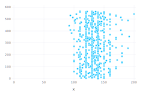

In [505]:
colors = Scale.color_discrete_hue().f(2)
plot(x=train_cholesterol.RestingBP, yx=train_cholesterol.Cholesterol, Theme(default_color=colors[1]))

┌ Warning: yx is not a recognized aesthetic. Ignoring.
└ @ Gadfly /Users/ragibahashan/.julia/packages/Gadfly/Xnkmc/src/mapping.jl:63


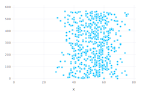

In [506]:
plot(x=train_cholesterol.Age, yx=train_cholesterol.Cholesterol, Theme(default_color=colors[1]))

┌ Warning: yx is not a recognized aesthetic. Ignoring.
└ @ Gadfly /Users/ragibahashan/.julia/packages/Gadfly/Xnkmc/src/mapping.jl:63


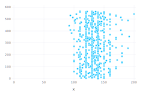

In [507]:
plot(x=train_cholesterol.RestingBP, yx=train_cholesterol.Cholesterol, Theme(default_color=colors[1]))

In [ ]:
# Variable d'intérêt
y_train_chol = train_cholesterol.Cholesterol
# select!(train_cholesterol, Not([
#     :Age,
#  :Sex,
# #  :RestingBP,
#  :Cholesterol,
#  :FastingBS,
#  :MaxHR,
#  :ExerciseAngina,
#  :Oldpeak,
#  :ChestPainType1,
#  :ChestPainType2,
#  :ChestPainType3,
#  :RestingECG1,
#  :RestingECG2,
#  :STSlope1,
#  :STSlope2,
# ]))
# Taille d'échantillon
n_train_chol = length(y_train_chol)

# Matrice de structure
# Ne pas prendre Heart Disease
X = hcat(ones(n_train_chol), Matrix(train_cholesterol[:,2:end-1]))

565×2 Array{Float64,2}:
 1.0  140.0
 1.0  140.0
 1.0  120.0
 1.0  150.0
 1.0  112.0
 1.0  140.0
 1.0  150.0
 1.0  130.0
 1.0  130.0
 1.0  150.0
 1.0  145.0
 1.0  118.0
 1.0  125.0
 ⋮    
 1.0  130.0
 1.0  132.0
 1.0  150.0
 1.0  140.0
 1.0  110.0
 1.0  120.0
 1.0  150.0
 1.0  120.0
 1.0  136.0
 1.0  122.0
 1.0  130.0
 1.0  110.0

In [ ]:
ȳ = mean(y_train_chol)
SST = sum( (y_train_chol .- ȳ).^2 )

2.096587886725664e6

In [ ]:
# Estimation des coefficients de régression
β̂ = X\y_train_chol

# Projection des points sur l'hyperplan de régression
ŷ = X*β̂

# Calcul des erreurs observées
e = y_train_chol - ŷ

# Calcul de la variabilité résiduelle (erreur)
SSE = sum( e.^2 )

# Calcul de la variabilité expliquée par la régression
SSR = SST - SSE

17112.58173240442

In [ ]:
println(SSE)
println(SST)
R2 = (SSR/SST)

2.0794753049932595e6
2.096587886725664e6


0.008162110370259703

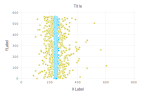

In [ ]:
ŷ = X*β̂
# mat = [ŷ[:], y_train_chol[:]]

y_pred = []
for pred in ŷ
    push!(y_pred, floor(Int, pred))
end
y_pred

colors = Scale.color_discrete_hue().f(2)
plot(layer(x=y_pred, Geom.point, Theme(default_color=colors[1])),
     layer(x=y_train_chol, Geom.point, Theme(default_color=colors[2])),
        Guide.XLabel("XLabel"),
        Guide.YLabel("YLabel"),
        Guide.Title("Title"))